<a href="https://colab.research.google.com/github/krumeto/Data-Science-Study/blob/master/07_linear_regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import torch.nn as nn

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


In [11]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise = 20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [15]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)  

In [16]:
learning_rate = 0.01  
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch: 10, loss = 4416.4067


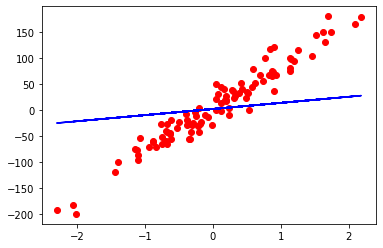

epoch: 20, loss = 3296.1096


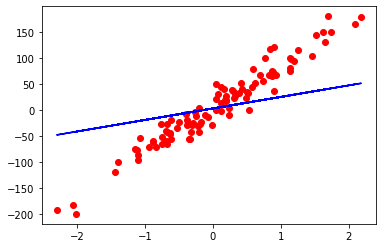

epoch: 30, loss = 2484.9587


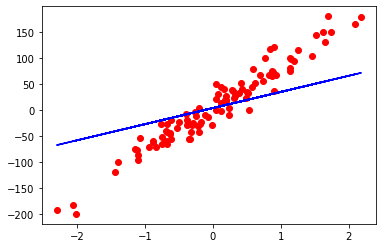

epoch: 40, loss = 1897.0472


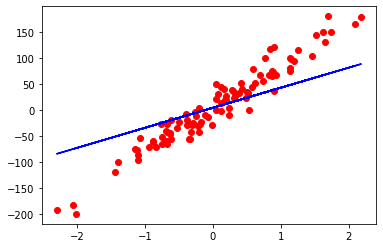

epoch: 50, loss = 1470.5361


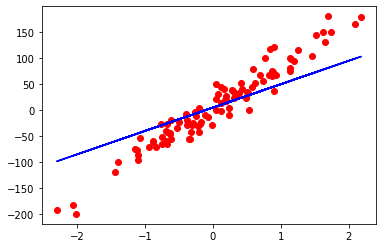

epoch: 60, loss = 1160.8472


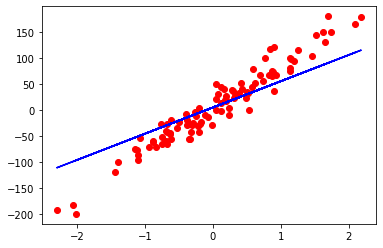

epoch: 70, loss = 935.8019


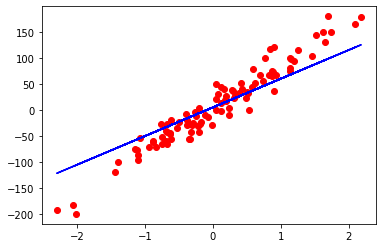

epoch: 80, loss = 772.1454


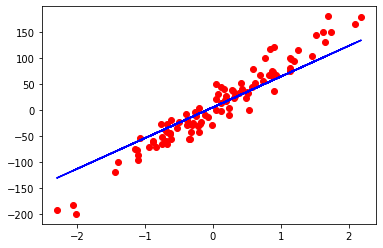

epoch: 90, loss = 653.0516


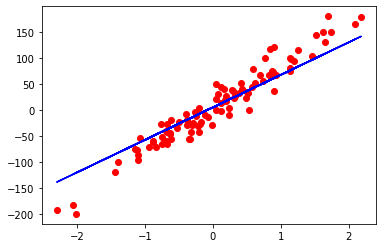

epoch: 100, loss = 566.3320


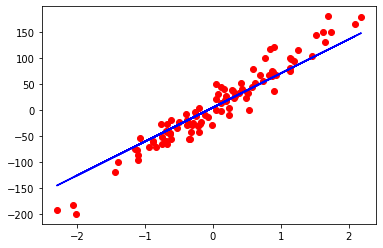

epoch: 110, loss = 503.1498


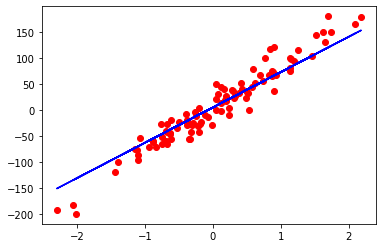

epoch: 120, loss = 457.0931


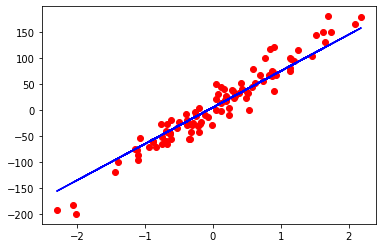

epoch: 130, loss = 423.5035


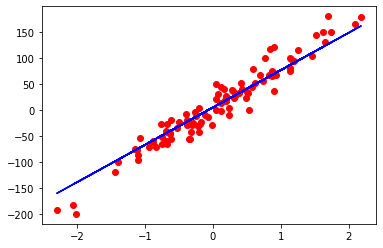

epoch: 140, loss = 398.9958


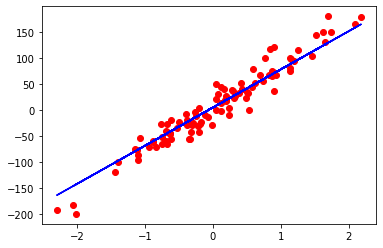

epoch: 150, loss = 381.1071


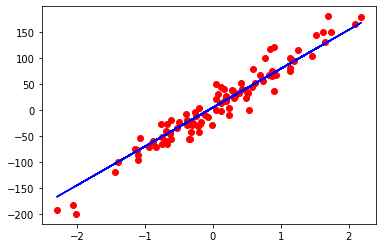

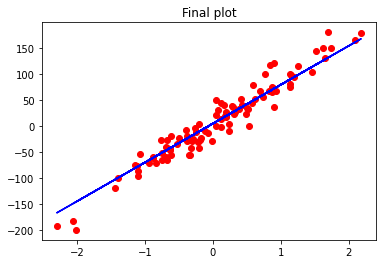

In [17]:
num_epochs = 150

for epoch in range(num_epochs):
  #forward + loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  #backward
  loss.backward()

  #update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")
    #Note the detach of the tensor
    predicted = model(X).detach().numpy()

    plt.plot(X_numpy,y_numpy, 'ro')
    plt.plot(X_numpy, predicted, 'b')
    plt.show()



#plot

#Note the detach of the tensor
predicted = model(X).detach().numpy()

plt.plot(X_numpy,y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.title('Final plot')
plt.show()
